In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/manthan0227/100-days-of-machine-learning/main/day29-sklearn-pipelines/train.csv')

In [4]:
df = df[['Age', 'Fare', 'Survived']]

In [5]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [7]:
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [10]:
df.shape

(714, 3)

In [11]:
X = df[['Age', 'Fare']]
y = df['Survived']

In [12]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [14]:
clf = DecisionTreeClassifier()

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = clf.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.6433566433566433

In [23]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf, X, y, cv=10, scoring='accuracy'))

0.6260954616588419

In [24]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [25]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [27]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [29]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [30]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [35]:
output = pd.DataFrame({
    'age': X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:,1]
})

In [36]:
output.sample(5)

,age,age_trf,fare,fare_trf
701,35.0,10.0,26.2875,9.0
672,70.0,14.0,10.5000,5.0
747,30.0,8.0,13.0000,6.0
133,29.0,7.0,26.0000,9.0
762,20.0,3.0,7.2292,0.0


In [38]:
output['age_labels'] = pd.cut(x=X_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [39]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
890,32.0,9.0,7.7500,1.0,"(30.0, 32.0]","(7.25, 7.775]"
106,21.0,4.0,7.6500,1.0,"(19.0, 21.0]","(7.25, 7.775]"
628,26.0,6.0,7.8958,3.0,"(25.0, 28.0]","(7.775, 7.896]"
236,44.0,12.0,26.0000,9.0,"(42.0, 47.0]","(18.75, 26.0]"
569,32.0,9.0,7.8542,2.0,"(30.0, 32.0]","(7.775, 7.896]"


In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred1)

0.6293706293706294

In [44]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(clf, X, y, cv=10, scoring='accuracy'))

0.6316901408450704

In [52]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    
    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0], color='red')
    plt.title('After')
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1], color='red')
    plt.title('After')
    
    plt.show()

0.6260954616588419


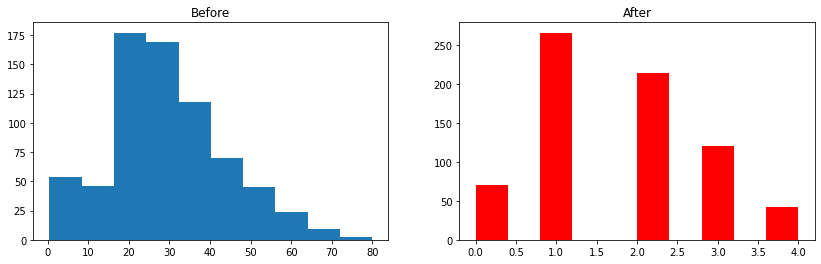

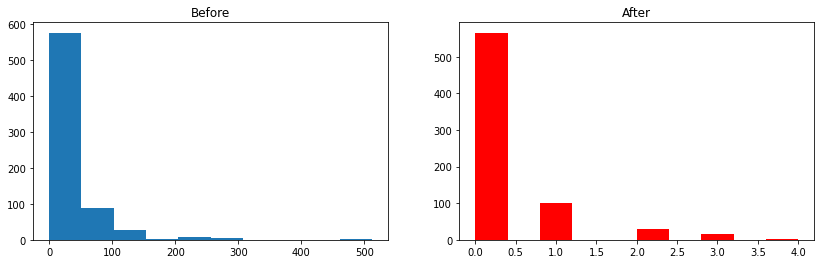

In [53]:
discretize(5, 'kmeans')

0.6414906103286385


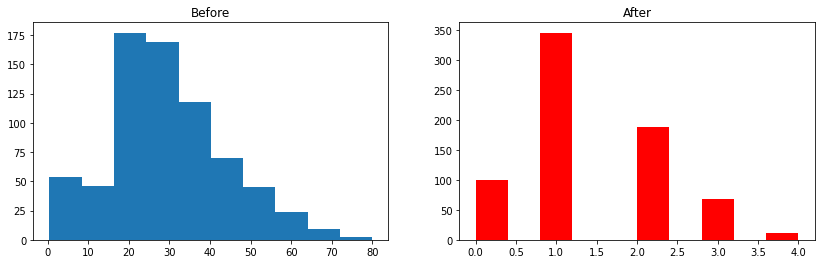

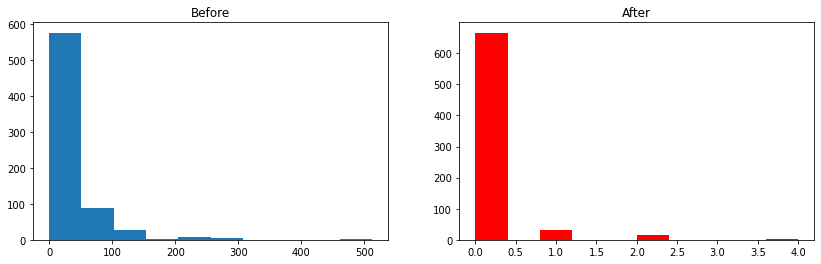

In [54]:
discretize(5, 'uniform')

0.6372848200312988


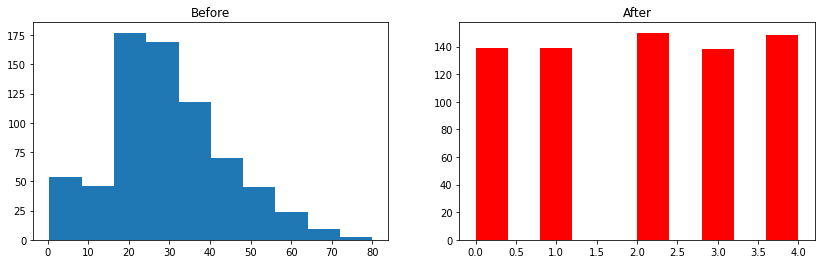

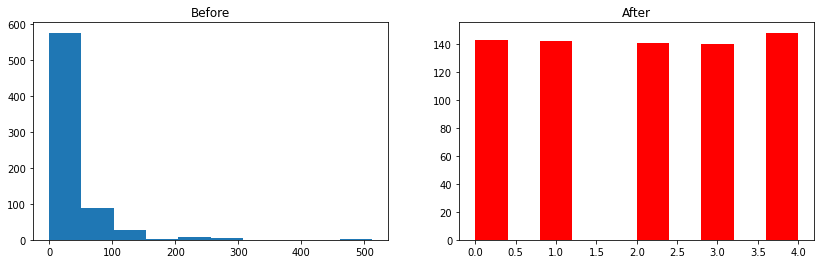

In [55]:
discretize(5, 'quantile')

## Uniform strategy gives the best accuracy